In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import decimal
from matplotlib import pyplot as plt

# <font color='skyblue'>Problem 1:</font>

In [3]:
# define needed variables
steps = 1000
a = 0.02
b = 0.2
c = -65
d = 8
V = -64
TAU = 0.25
u = b * V

### 1a:

In [4]:
def neuron_spiking(row, a, b, c, d, u, V, VV, uu, spike_ts, T1=0, I=0.0):
    for t in np.linspace(0, steps, 4001): # 4001 since we need to draw 5 charts

        V += TAU * (0.04 * (V**2) + 5 * V + 140 - u + (I*1.0))
        u += TAU * a * (b * V - u)
        if V > 30:
            VV.append(30)
            V = c
            u = u + d
            spike_ts.append(1)
        else:
            VV.append(V)
            spike_ts.append(0)
        uu.append(u)
        
    data_frame[row] = pd.DataFrame({'x' : np.linspace(0, steps, 4001), 'VV' : VV})
    plt.xlabel('Time Step (ms)')
    return sum(spike_ts[800:])/800

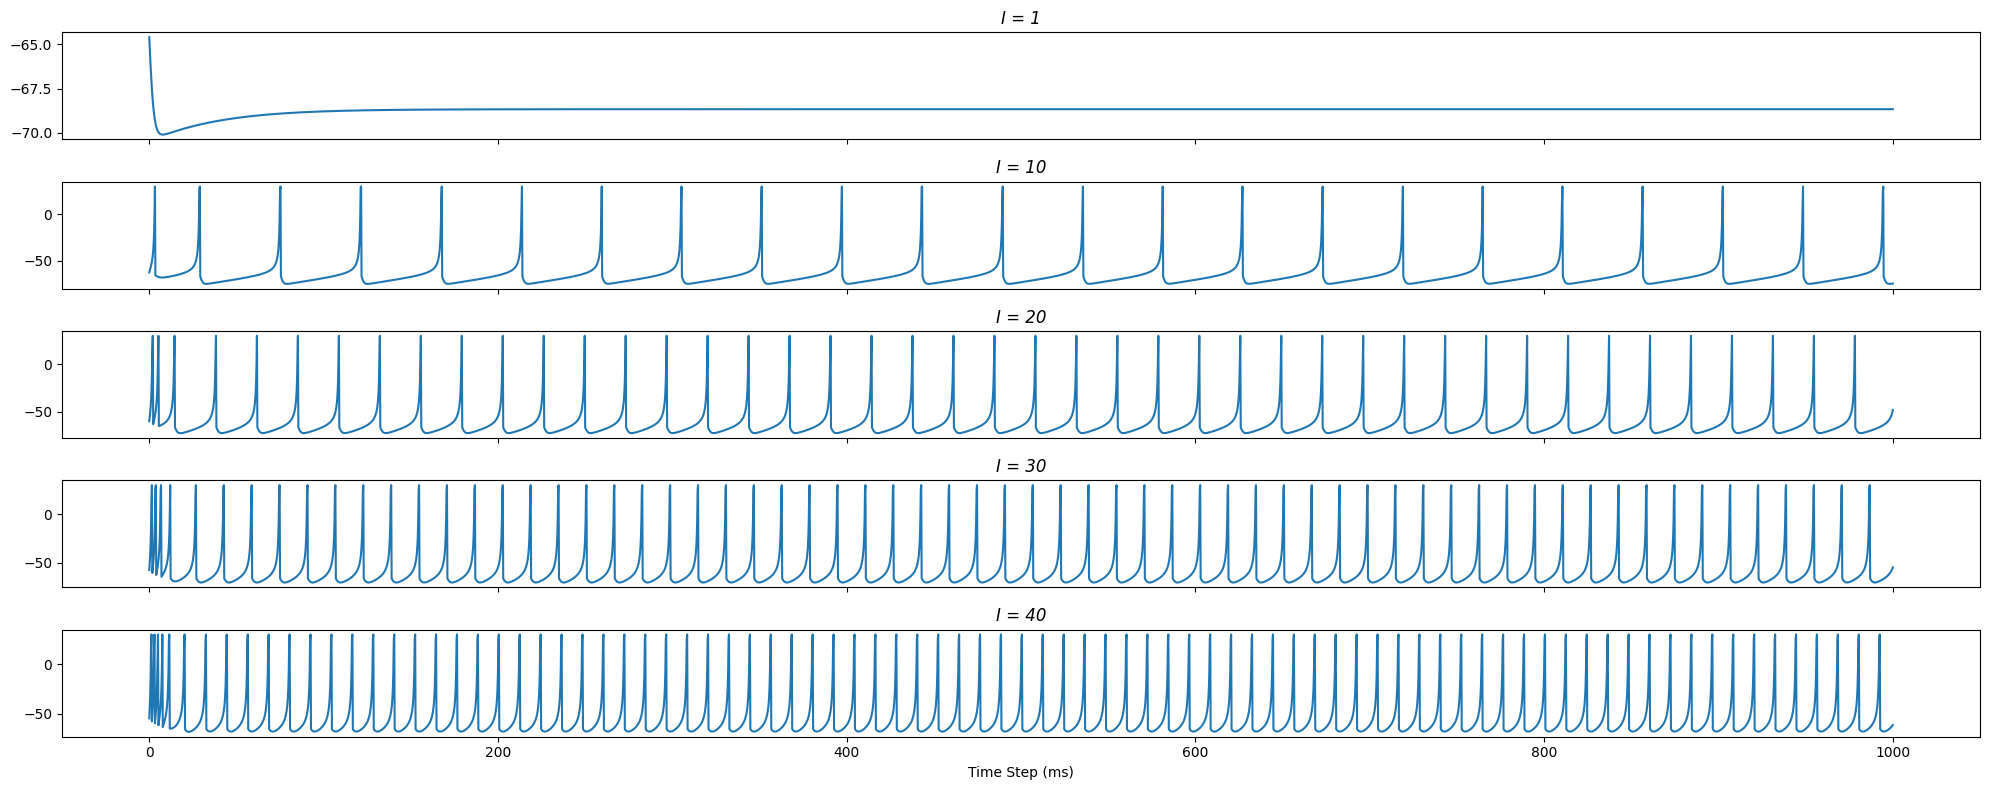

In [7]:
data_frame = [0 for _ in range(5)]
fig, axis = plt.subplots(len(data_frame), 1, sharex=True, figsize=(20,8), squeeze=False)
row = 0
II = [1, 10, 20, 30, 40]
RR = []
for i in II:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    RR.append(R)

count = 0    
for j in data_frame:
    axis[count, 0].set_title(f'I = {II[count]}', fontstyle='italic')
    axis[count, 0].plot(data_frame[count]['x'],data_frame[count]['VV'])
    count += 1    
plt.savefig('problem1a.png')
plt.tight_layout()
plt.show()

### 1b:

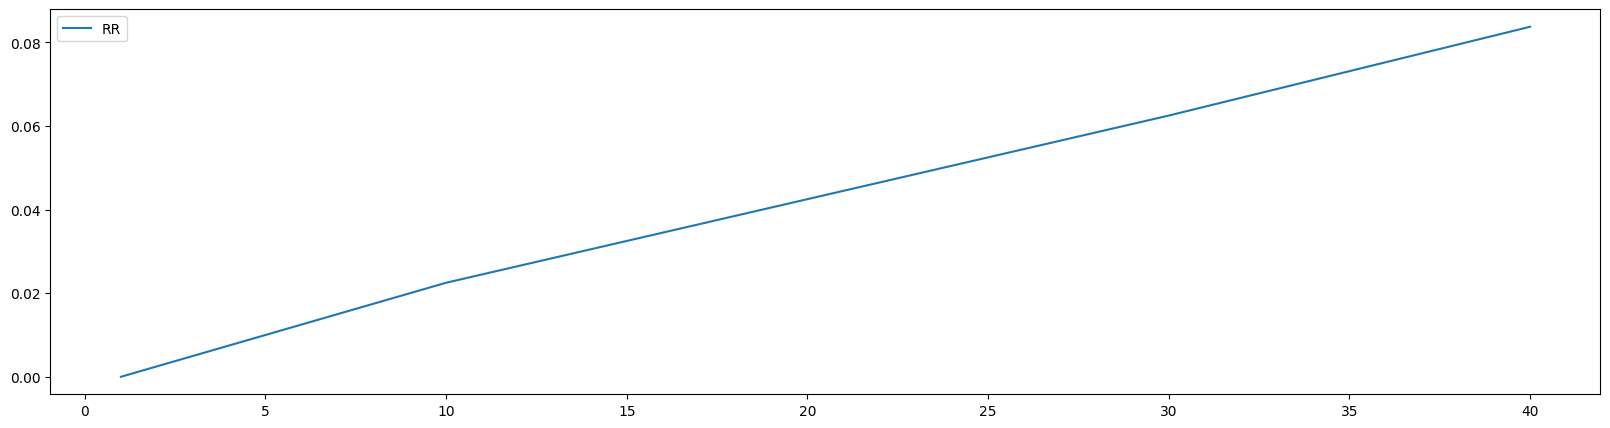

In [29]:
df = pd.DataFrame({'II':II, 'RR': RR})
df.plot.line(x = 'II', y = 'RR', rot=0, figsize=(20, 5))
plt.xlabel('')
plt.savefig('problem1b.png')

# <font color='skyblue'>Problem 2:</font>

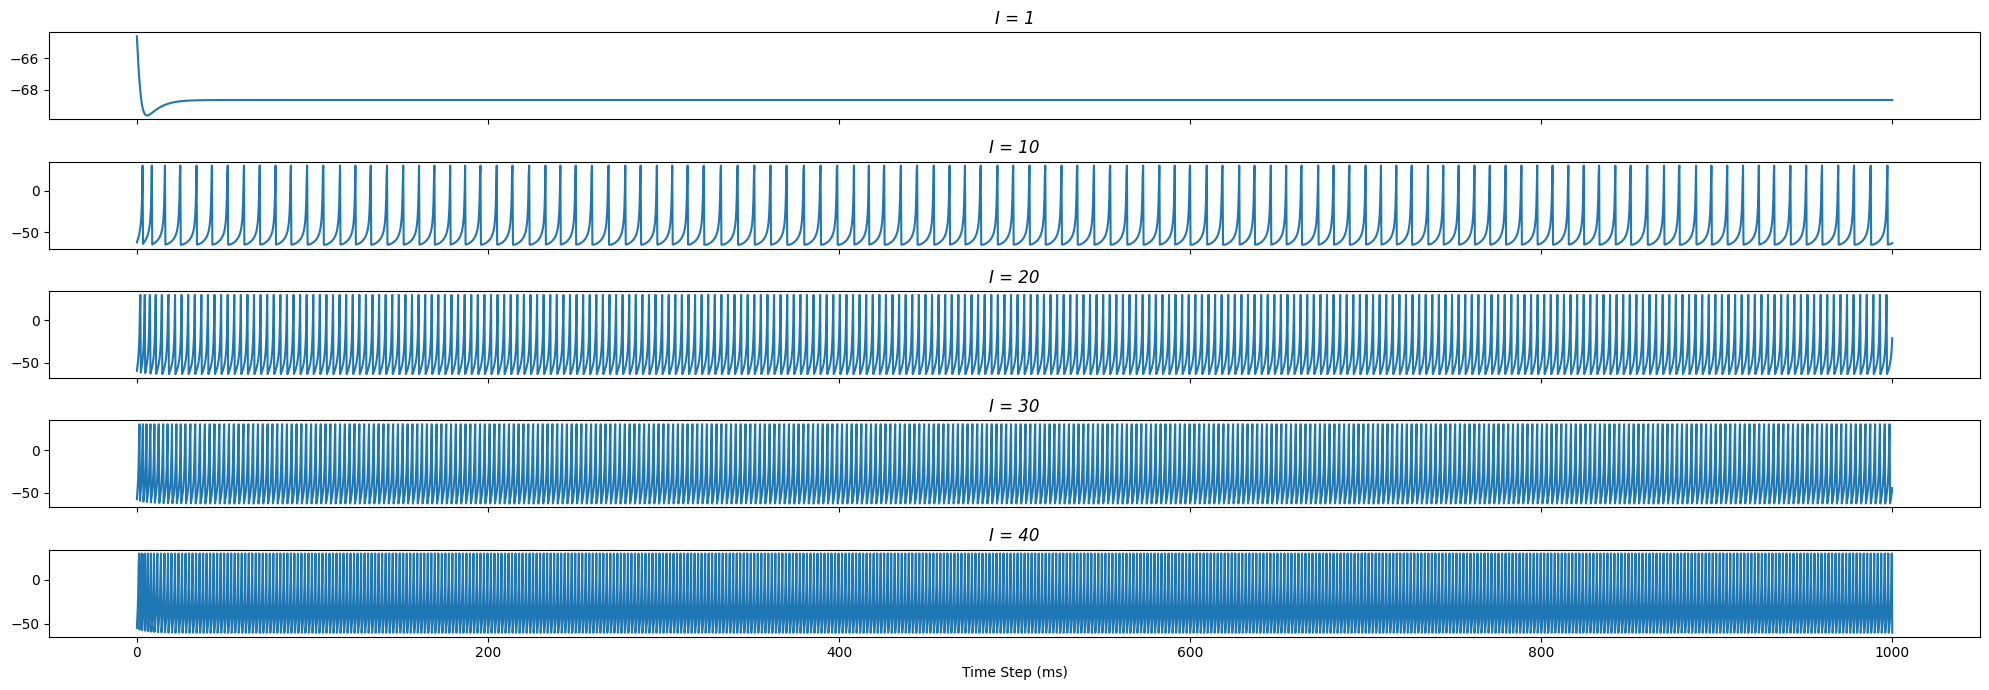

In [8]:
data_frame = [0 for _ in range(5)]
a, b, c, d = 0.1, 0.2, -65, 2
fig, axis = plt.subplots(len(data_frame), 1, sharex=True, figsize=(20,7), squeeze=False)
row = 0
FS_II = [1, 10, 20, 30, 40]
FS_RR = []

for i in FS_II:
    R = neuron_spiking(row, a, b, c, d, u, V, [], [], [], I=i)
    row += 1
    FS_RR.append(R)

count = 0    
for j in data_frame:
    axis[count, 0].set_title(f'I = {FS_II[count]}', fontstyle='italic')
    axis[count, 0].plot(data_frame[count]['x'],data_frame[count]['VV'])
    count += 1    
plt.savefig('problem2.png')
plt.tight_layout()
plt.show()


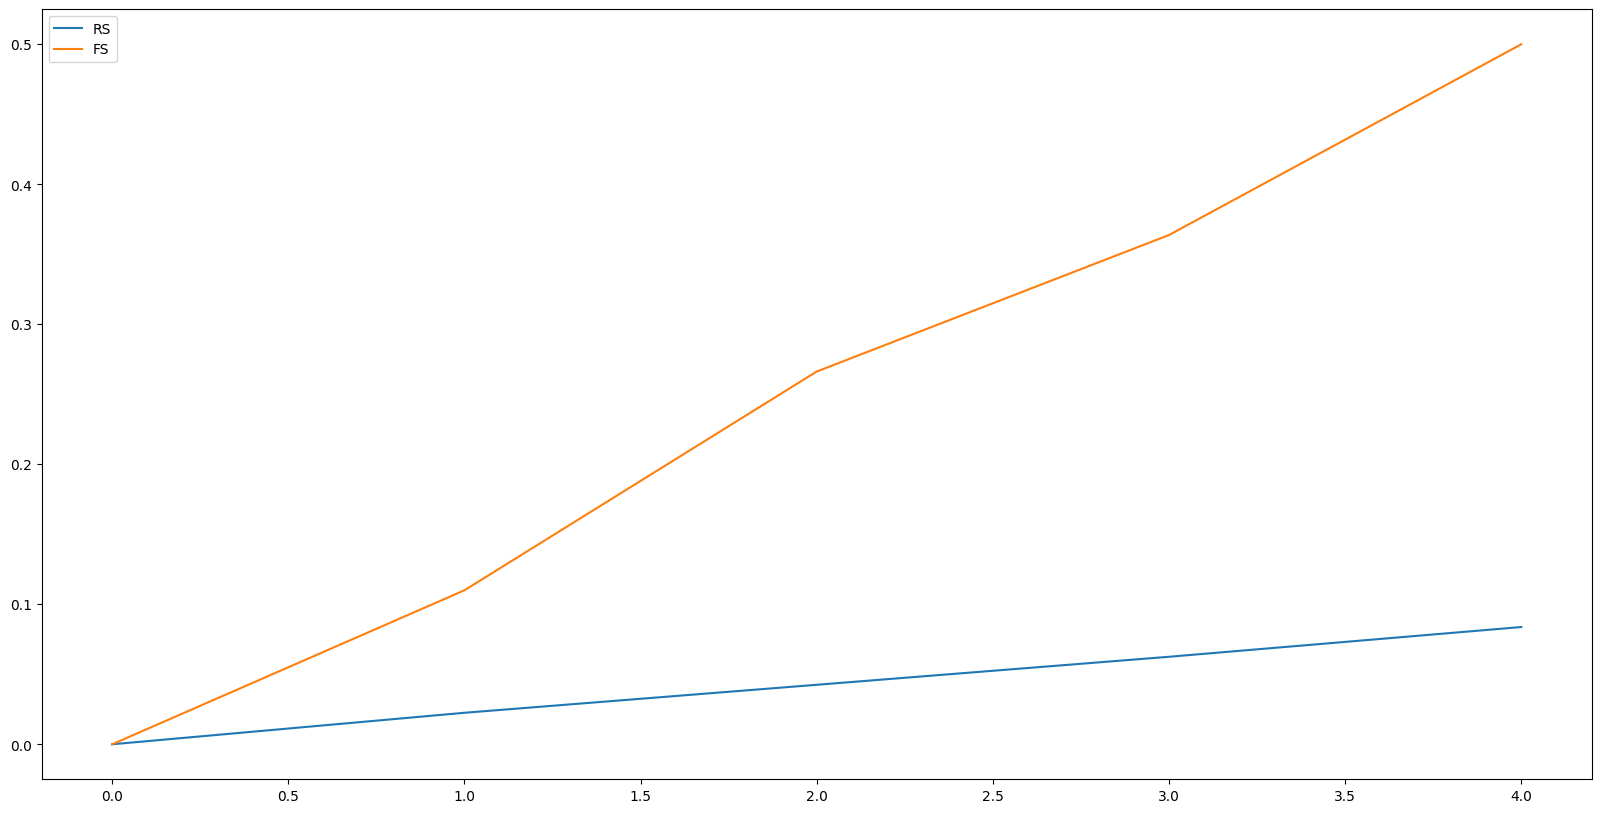

In [31]:
df_compare = pd.DataFrame({'RS' : RR, 'FS' : FS_RR})
df_compare.plot(figsize=(20, 10))
plt.savefig('compare_striking.png')

# <font color='skyblue'>Problem 3:</font>

In [9]:
def neuron_chattering(row, W):
    
    y_a, y_b = 0, 0
    I_a, I_b = 5.0, 2.0
    a, b, c, d = 0.02, 0.2, -50, 2
    V_a = V_b = -65
    VV_a, uu_a, VV_b, uu_b = [], [], [], []
    u_a, u_b = b * V_a, b * V_b 
    
    for t in np.linspace(0, steps, 4001): # 4001 since we need to draw 5 charts
        
        IA = I_a - W * y_b
        IB = I_b + W * y_a
        V_a += TAU * (0.04 * (V_a*V_a) + 5 * V_a + 140 - u_a + (IA*1.0))
        u_a += TAU * a * (b * V_a - u_a)
        V_b += TAU * (0.04 * (V_b*V_b) + 5 * V_b + 140 - u_b + (IB*1.0))
        u_b += TAU * a * (b * V_b - u_b)
        
        
        y_a = 1 if V_a > 30 else 0
        y_b = 1 if V_b > 30 else 0

        if V_a > 30:
            VV_a.append(30)
            V_a = c
            u_a += d
        else:
            VV_a.append(V_a)
            
        if V_b > 30:
            VV_b.append(30)
            V_b = c
            u_b += d
        else:
            VV_b.append(V_b)            

        uu_a.append(u_a)
        uu_b.append(u_b)
      
    sns.lineplot(ax=axis[row], x=np.linspace(0, 1000, 4001), label='VV_A', y=VV_a)
    sns.lineplot(ax=axis[row], x=np.linspace(0, 1000, 4001), label='VV_b', y=VV_b)
    plt.xlabel('Time Step (ms)')


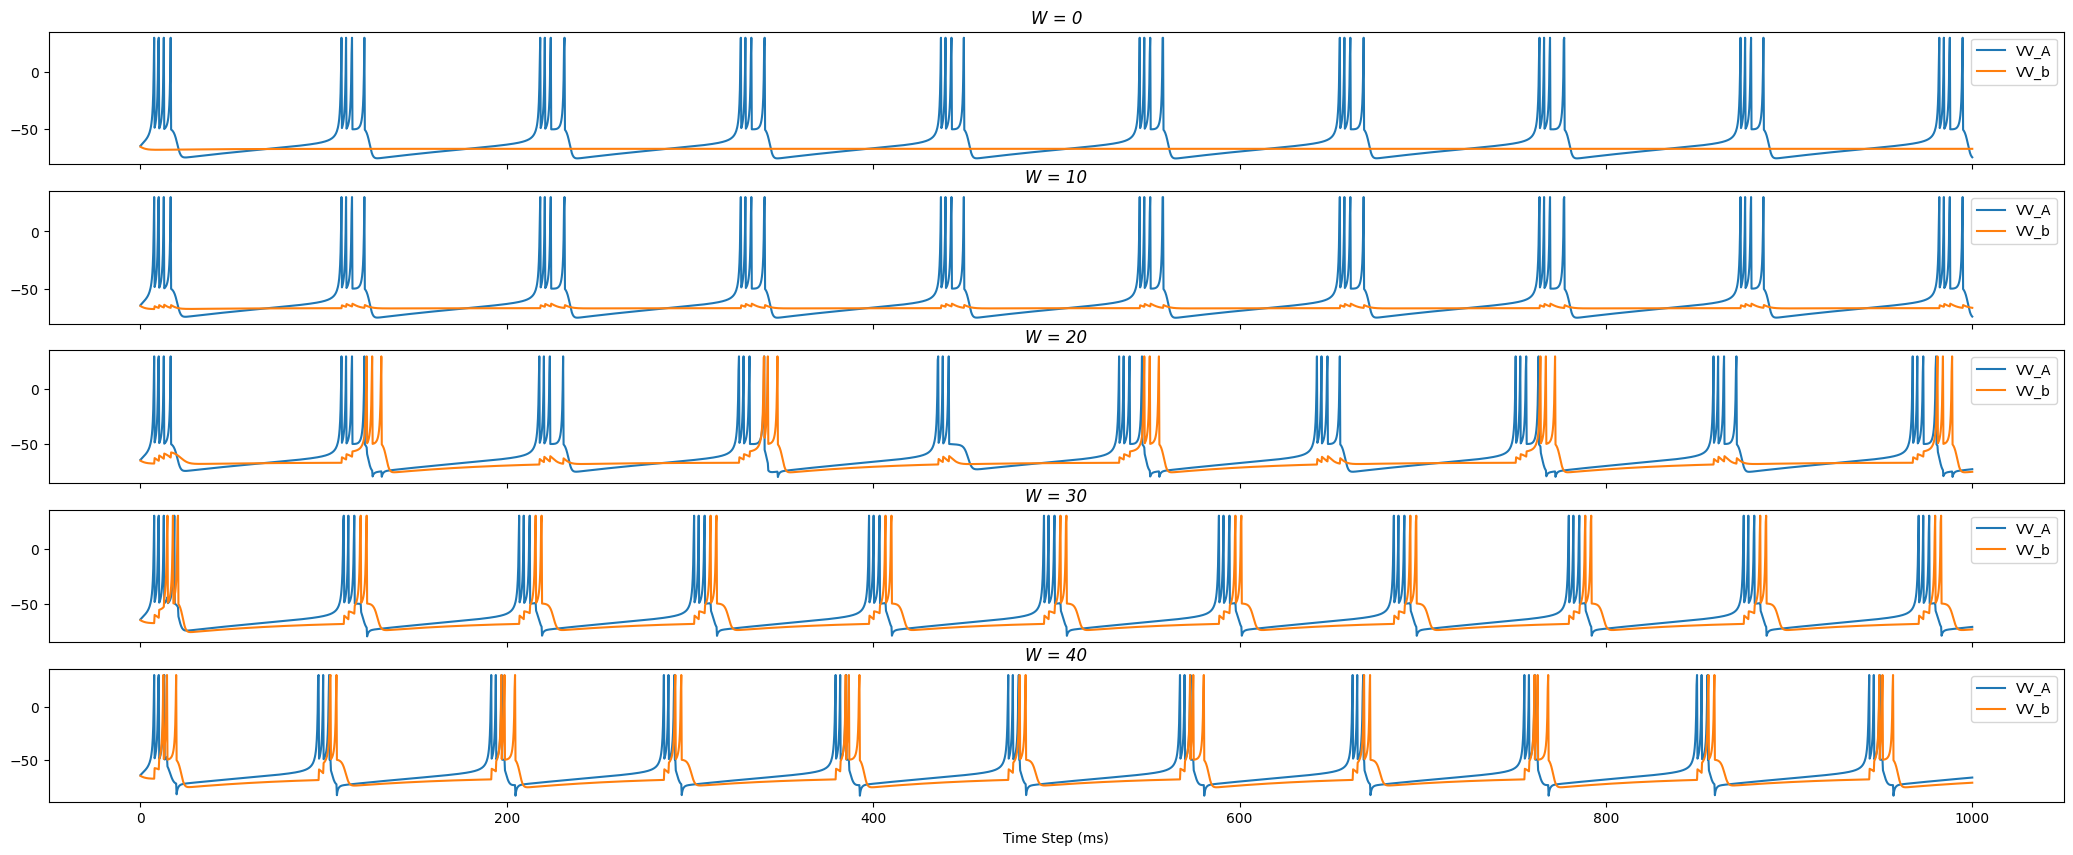

In [10]:
fig, axis = plt.subplots(5, 1, sharex=True, figsize=(26,10))
row = 0
WW = [0, 10, 20, 30, 40]
for w in WW:
    neuron_chattering(row, w)
    axis[row].set_title(f'W = {WW[row]}', fontstyle='italic')
    row += 1
plt.savefig('problem3.png')